<a href="https://colab.research.google.com/github/sateeshmunagala/ml-python/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
# read data from my github url
url="https://raw.githubusercontent.com/sateeshmunagala/Datasets/main/AirPassengers.csv"
df=pd.read_csv(url)

In [ ]:
df["Month"]=pd.to_datetime(df["Month"]) 

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [ ]:
data.index

In [ ]:
ts=data["#Passengers"]
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [ ]:
# 1. specify the index as string constant
ts['1949-01-01']

112

In [ ]:
# use datetime python module
from datetime import datetime

ts[datetime(1949,1,1)]

112

In [ ]:
# specify the entire range
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [ ]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [ ]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [ ]:
# How to check stationarity of a time series
import matplotlib.pyplot as plt

In [ ]:
plt.plot(ts)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
test_stationarity(ts)

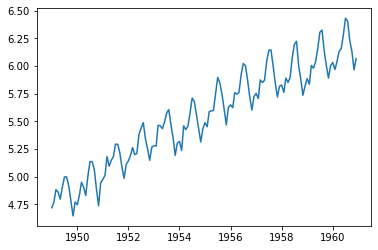

In [ ]:
# How to make time series as stationarity
# reduce the trend by transoforming the series with log functions
ts_log = np.log(ts)
plt.plot(ts_log)

In [ ]:
# measure ACF & PACF
from statsmodels.tsa.stattools import acf,pacf

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


In [1]:
import pandas as pd

1.1.5
